In [1]:
from bs4 import BeautifulSoup as bs
import requests
import time
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
start_time = time.time()

urls = []

for page in (0, 25, 50, 75, 100, 125, 175):
    url_start = 'https://finance.yahoo.com/most-active/?count=25&offset='
    url = url_start + str(page)
    urls.append(url)

In [3]:
value_list= []

for links in urls:
    page = requests.get(links)
    soup = bs(page.text, 'html.parser')
    tables = soup.find('table', class_ = "W(100%)")
    table_row = tables.find_all('tr')
    
    for row in table_row[1:]:
        rows = row.find_all('td')
        
        row_value= []
        for data in rows[0:]:
            stock_rows = data.text
            row_value.append(stock_rows)
        value_list.append(row_value)
           
print(value_list)    

[['GME', 'GameStop Corp.', '22.21', '-5.46', '-19.73%', '96.08M', '18.091M', '6.8B', '1,110.50', ''], ['TSLA', 'Tesla, Inc.', '177.46', '+2.62', '+1.50%', '77.446M', '97.806M', '565.955B', '45.50', ''], ['AMD', 'Advanced Micro Devices, Inc.', '164.46', '+1.84', '+1.13%', '65.944M', '61.856M', '265.818B', '238.35', ''], ['NIO', 'NIO Inc.', '5.28', '+0.02', '+0.38%', '58.708M', '56.977M', '11.276B', 'N/A', ''], ['HOOD', 'Robinhood Markets, Inc.', '20.08', '+2.18', '+12.18%', '53.207M', '16.428M', '17.647B', '143.43', ''], ['MARA', 'Marathon Digital Holdings, Inc.', '19.45', '-0.20', '-1.02%', '48.373M', '57.557M', '5.309B', '12.16', ''], ['INTC', 'Intel Corporation', '31.85', '-0.18', '-0.56%', '41.45M', '50.003M', '135.581B', '32.84', ''], ['AAPL', 'Apple Inc.', '189.87', '+0.03', '+0.02%', '41.283M', '64.447M', '2.911T', '29.48', ''], ['SOFI', 'SoFi Technologies, Inc.', '7.28', '+0.16', '+2.25%', '36.606M', '49.776M', '7.697B', 'N/A', ''], ['NVDA', 'NVIDIA Corporation', '924.79', '-18.

In [4]:
table_title = tables.find_all('th')

for title in table_title[0:]:
        stock_table_title = [title.text for title in table_title]
        df = pd.DataFrame(value_list, columns = stock_table_title)
df

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM),52 Week Range
0,GME,GameStop Corp.,22.21,-5.46,-19.73%,96.08M,18.091M,6.8B,"1,110.50",
1,TSLA,"Tesla, Inc.",177.46,+2.62,+1.50%,77.446M,97.806M,565.955B,45.50,
2,AMD,"Advanced Micro Devices, Inc.",164.46,+1.84,+1.13%,65.944M,61.856M,265.818B,238.35,
3,NIO,NIO Inc.,5.28,+0.02,+0.38%,58.708M,56.977M,11.276B,N/A,
4,HOOD,"Robinhood Markets, Inc.",20.08,+2.18,+12.18%,53.207M,16.428M,17.647B,143.43,
...,...,...,...,...,...,...,...,...,...,...
170,GRAB,Grab Holdings Limited,3.7200,+0.0700,+1.92%,27.337M,26.53M,14.705B,N/A,
171,PBR,Petróleo Brasileiro S.A. - Petrobras,15.02,-0.21,-1.38%,26.831M,23.076M,96.949B,4.37,
172,VALE,Vale S.A.,12.99,+0.33,+2.61%,26.195M,27.487M,55.601B,7.18,
173,PFE,Pfizer Inc.,28.64,-0.28,-0.97%,26.106M,42.607M,162.291B,N/A,


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Symbol             175 non-null    object
 1   Name               175 non-null    object
 2   Price (Intraday)   175 non-null    object
 3   Change             175 non-null    object
 4   % Change           175 non-null    object
 5   Volume             175 non-null    object
 6   Avg Vol (3 month)  175 non-null    object
 7   Market Cap         175 non-null    object
 8   PE Ratio (TTM)     175 non-null    object
 9   52 Week Range      175 non-null    object
dtypes: object(10)
memory usage: 13.8+ KB


In [6]:
# Clean change column
df['Change'] = df['Change'].astype(float)

# Clean % change column
df['% Change'] = df['% Change'].str.strip('%').astype(float)

In [7]:
# Rename column in place
df.rename(columns={'Price (Intraday)': 'Price_(intraday)'}, inplace=True)


In [8]:
# Clean Volume column
df['Volume'] = df['Volume'].str.strip('M').astype(float)
# Rename column in place
df.rename(columns={'Volume': 'Volume(M)'}, inplace=True)

# Clean Avg vol (3months) column
df['Avg Vol (3 month)'] = df['Avg Vol (3 month)'].str.strip('M').astype(float)
# Rename column in place
df.rename(columns={'Avg Vol (3 month)': 'Avg_Vol_(3 month)(M)'}, inplace=True)



In [9]:
# Split and clean 'Market Cap' column
df['Market Cap'], df['Multiplier'] = df['Market Cap'].str[:-1], df['Market Cap'].str[-1]
# Convert 'Market Cap' column to float
df['Market Cap'] = pd.to_numeric(df['Market Cap'], errors='coerce')
# Convert 'Market Cap' values to billions
df['Market_Cap (Billions)'] = df.apply(lambda x: x['Market Cap'] * 1000 if x['Multiplier'] == 'T' else x['Market Cap'], axis=1)
# Drop 'Market Cap' and 'Multiplier' columns
df.drop(columns=['Market Cap', 'Multiplier'], inplace=True)

In [13]:
# Clean PE Ratio (TTM) column
df['PE Ratio (TTM)'] = df['PE Ratio (TTM)'].str.replace('N/A', '0')
df['PE Ratio (TTM)'] = df['PE Ratio (TTM)'].str.replace(',', '').astype(float)
# Rename column in place
df.rename(columns={'PE Ratio (TTM)': 'PE_Ratio_(TTM)'}, inplace=True)


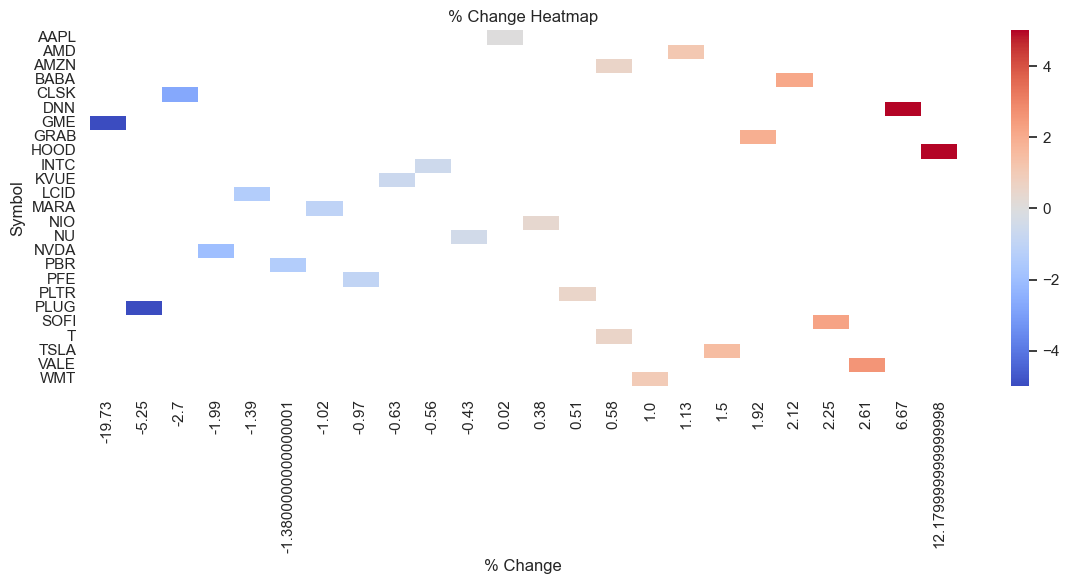

In [14]:
# 1. Heatmap for % Change
import seaborn as sns

sns.set(style="white")

plt.figure(figsize=(12, 6))

grouped_data = df.groupby('Symbol')['% Change'].mean().reset_index()
heatmap_data = grouped_data.pivot(index='Symbol', columns='% Change', values='% Change')

sns.heatmap(heatmap_data, cmap='coolwarm', vmin=-5, vmax=5)

plt.title('% Change Heatmap')
plt.tight_layout()
plt.show()

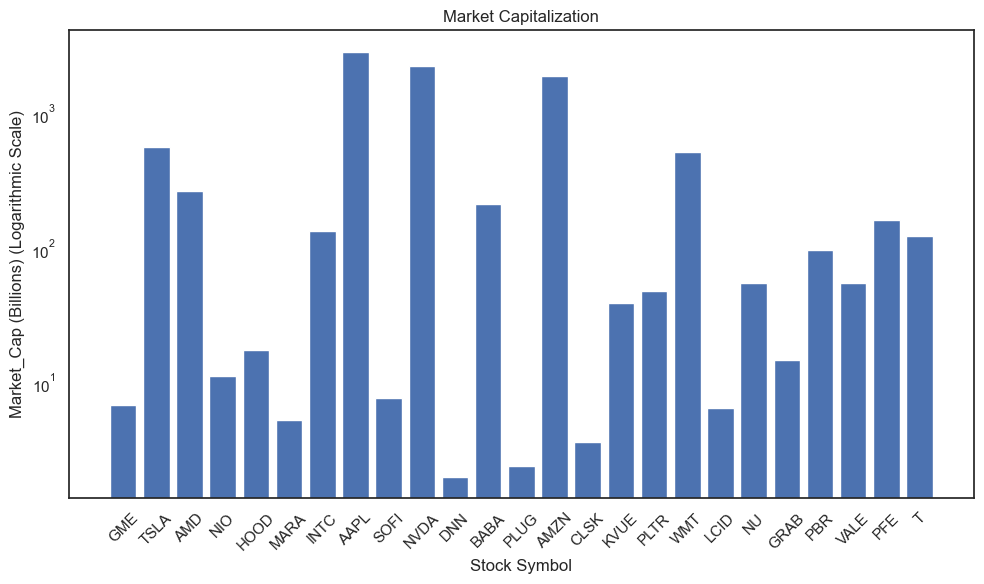

In [15]:
# 2. Bar Chart for Market Cap (logarithmic scale)
plt.figure(figsize=(10, 6))
plt.bar(df['Symbol'], df['Market_Cap (Billions)'], log=True)  # Logarithmic scale for large values
plt.xlabel('Stock Symbol')
plt.ylabel('Market_Cap (Billions) (Logarithmic Scale)')
plt.title('Market Capitalization')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

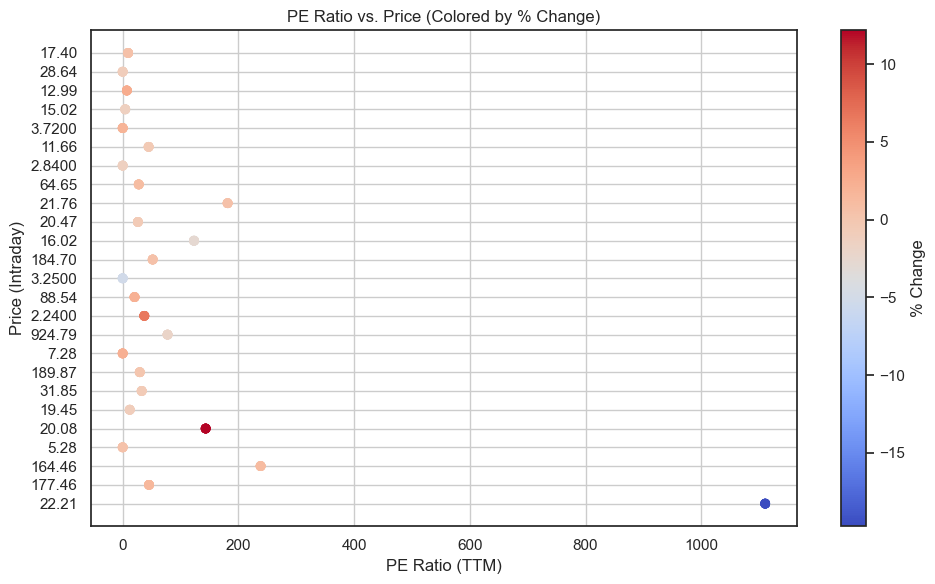

In [16]:
# 3. Scatter Plot for PE Ratio vs. Price
plt.figure(figsize=(10, 6))
plt.scatter(df['PE_Ratio_(TTM)'], df['Price_(intraday)'], c=df['% Change'], cmap='coolwarm')  # Color by % Change
plt.colorbar(label='% Change')
plt.xlabel('PE Ratio (TTM)')
plt.ylabel('Price (Intraday)')
plt.title('PE Ratio vs. Price (Colored by % Change)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
x

In [ ]:
df['Price_(intraday)'].info